In [1]:
!pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
import os

     |████████████████████████████████| 12.2 MB 4.7 MB/s eta 0:00:01    |█████████████████▋              | 6.7 MB 5.3 MB/s eta 0:00:02


In [2]:
a1 = 3
a2 = 6
a3 = 19
b1 = 1
b2 = 18
b3 = 10
c1 = 16
c2 = 13
c3 = 6

# Задача 7

а)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           7000
 Number of total equations: -         6000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :           1000
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  9.93961E+03  1.00000E+00
    1  5.55705E+00  6.45430E-01
    2  5.52484E+

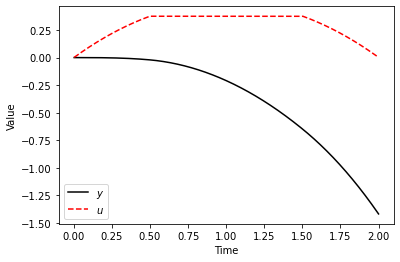

In [18]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 1001
m.time = np.linspace(0, 2, nt) # Задаем отрезок времени

# Задаём переменные со всеми ограничениями
y = m.Var(value=0)
z = m.Var(value=5)
u = m.Var(value=0,lb=-3/8, ub=3/8)
t = m.Var(value=0)

# Отмечаем последнюю точку
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u - t)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == (u**2)/2 - t*y + y) # Задаем функционал
m.Obj(z * final)  # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True) # Находим решение


# График решения
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

b)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           7000
 Number of total equations: -         6000
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :           1000
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.23428E+04  1.00000E+00
    1  5.49061E+00  6.45430E-01
    2  5.45698E+

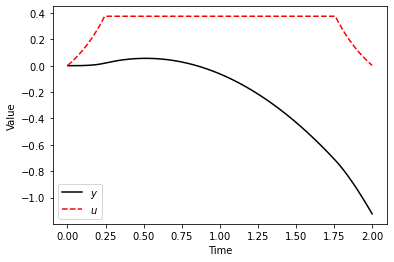

In [19]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 1001
m.time = np.linspace(0, 2, nt) # Задаем отрезок времени

# Задаём переменные со всеми ограничениями
y = m.Var(value=0)
z = m.Var(value=5)
u = m.Var(value=0,lb=-3/8, ub=3/8)
t = m.Var(value=0)

# Отмечаем последнюю точку
p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u + u**2 - t)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == (u**2)/2 - t*y + y) # Задаем функционал
m.Obj(z * final)  # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=True) # Находим решение


# График решения
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()